In [12]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.neighbors import NearestNeighbors

# Function to preprocess and load images
def preprocess_images(image_paths, img_height, img_width):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

# Function to load filtered images and their labels
def load_filtered_images(image_paths, folder_names):
    labels = [folder_names.index(os.path.basename(os.path.dirname(img_path))) for img_path in image_paths]
    return preprocess_images(image_paths, img_height, img_width), np.array(labels)

# Function to load image dataset based on user preferences
def load_image_dataset(dataset_path, weather, occasion, gender):
    filtered_images = []
    folder_names = []
    for root, dirs, files in os.walk(dataset_path):
        folder_name = os.path.basename(root)
        if weather in folder_name.lower() and occasion in folder_name.lower() and gender in folder_name.lower():
            for file in files:
                if file.endswith(".jpg") or file.endswith(".png"):
                    filtered_images.append(os.path.join(root, file))
            folder_names.append(folder_name)
    return filtered_images, folder_names

# Function to get user preferences
def get_user_preferences():
    print("Welcome to the Outfit Recommendation System!")
    print("Please provide your preferences:")

    weather = input("Weather (summer/winter): ")
    occasion = input("Occasion (beach/casual/formal): ")
    gender = input("Gender (men/women): ")

    return weather, occasion, gender

# Define image dimensions
img_height, img_width = 224, 224  # Adjust as needed

# Load the dataset based on user preferences
def load_dataset():
    dataset_path = "Dataset"  # Specify the path to your dataset directory
    weather, occasion, gender = get_user_preferences()
    filtered_images, folder_names = load_image_dataset(dataset_path, weather, occasion, gender)
    return filtered_images, folder_names

# Build and train the CNN model to extract features
def build_cnn_model(img_height, img_width, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Main function
def main():
    # Load the dataset
    filtered_images, folder_names = load_dataset()
    print("Number of images found:", len(filtered_images))
    if len(filtered_images) == 0:
        print("No matching images found. Exiting...")
        return

    # Load filtered images and their labels
    X, y = load_filtered_images(filtered_images, folder_names)
    num_classes = len(folder_names)

    # Build and train the CNN model
    cnn_model = build_cnn_model(img_height, img_width, num_classes)
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    cnn_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Extract features using the trained CNN model
    features = cnn_model.predict(X)

    # Build KNN model
    knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
    knn_model.fit(features)

    # Get recommendations
    query_feature = features[0].reshape(1, -1)  # Example: Use the first image's features as query
    distances, indices = knn_model.kneighbors(query_feature)
    recommended_outfits = [filtered_images[i] for i in indices[0]]

    print("Top 5 recommended outfits:")
    for outfit in recommended_outfits:
        print(outfit)

# Run the main function
if __name__ == "__main__":
    main()


Welcome to the Outfit Recommendation System!
Please provide your preferences:
Number of images found: 103
Epoch 1/10


c:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 0.7057 - loss: 1.9373 - val_accuracy: 0.0000e+00 - val_loss: 2.5795
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.7748 - loss: 0.6278 - val_accuracy: 0.0000e+00 - val_loss: 0.9432
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.8065 - loss: 0.5736 - val_accuracy: 0.0000e+00 - val_loss: 1.6610
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 0.8260 - loss: 0.4379 - val_accuracy: 0.0000e+00 - val_loss: 1.2669
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.7752 - loss: 0.5516 - val_accuracy: 0.0000e+00 - val_loss: 1.1129
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.7987 - loss: 0.4748 - val_accuracy: 0.0000e+00 - val_loss: 1.7946
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.7948 - loss: 0.5047 - val_accuracy: 0.0000e+00 - val_loss: 1.2801
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.7674 - loss: 0.4941 - val_accuracy: 0

Welcome to the Outfit Recommendation System!
Please provide your preferences:


Number of images found: 103
Epoch 1/10


c:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.6466 - loss: 1.6967 - val_accuracy: 0.0000e+00 - val_loss: 0.9704
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step - accuracy: 0.6218 - loss: 0.6333 - val_accuracy: 0.0000e+00 - val_loss: 1.8184
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.7831 - loss: 0.5004 - val_accuracy: 0.0000e+00 - val_loss: 1.4113
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.7909 - loss: 0.4411 - val_accuracy: 0.0000e+00 - val_loss: 1.7076
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.8104 - loss: 0.4019 - val_accuracy: 0.0000e+00 - val_loss: 1.0673
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.9466 - loss: 0.3821 - val_accuracy: 0.0000e+00 - val_loss: 1.9745
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.8053 - loss: 0.2923 - val_accuracy: 0.0476 - val_loss: 2.0107
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.9561 - loss: 0.1567 - val_accuracy: 0.190

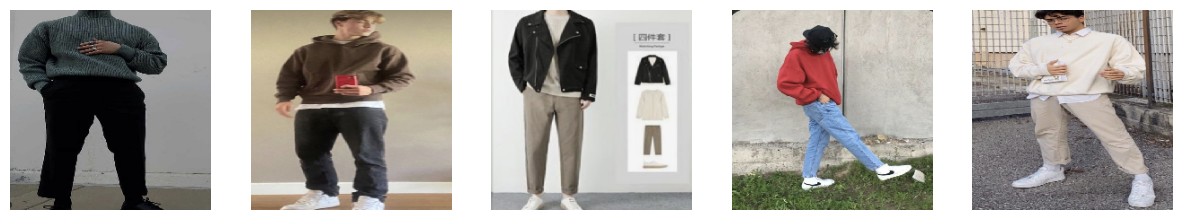

In [14]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Function to preprocess and load images
def preprocess_images(image_paths, img_height, img_width):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

# Function to load filtered images and their labels
def load_filtered_images(image_paths, folder_names):
    labels = [folder_names.index(os.path.basename(os.path.dirname(img_path))) for img_path in image_paths]
    return preprocess_images(image_paths, img_height, img_width), np.array(labels)

# Function to load image dataset based on user preferences
def load_image_dataset(dataset_path, weather, occasion, gender):
    filtered_images = []
    folder_names = []
    for root, dirs, files in os.walk(dataset_path):
        folder_name = os.path.basename(root)
        if weather in folder_name.lower() and occasion in folder_name.lower() and gender in folder_name.lower():
            for file in files:
                if file.endswith(".jpg") or file.endswith(".png"):
                    filtered_images.append(os.path.join(root, file))
            folder_names.append(folder_name)
    return filtered_images, folder_names

# Function to get user preferences
def get_user_preferences():
    print("Welcome to the Outfit Recommendation System!")
    print("Please provide your preferences:")

    weather = input("Weather (summer/winter): ")
    occasion = input("Occasion (beach/casual/formal): ")
    gender = input("Gender (men/women): ")

    return weather, occasion, gender

# Define image dimensions
img_height, img_width = 224, 224  # Adjust as needed

# Load the dataset based on user preferences
def load_dataset():
    dataset_path = "Dataset"  # Specify the path to your dataset directory
    weather, occasion, gender = get_user_preferences()
    filtered_images, folder_names = load_image_dataset(dataset_path, weather, occasion, gender)
    return filtered_images, folder_names

# Build and train the CNN model to extract features
def build_cnn_model(img_height, img_width, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Main function
def main():
    # Load the dataset
    filtered_images, folder_names = load_dataset()
    print("Number of images found:", len(filtered_images))
    if len(filtered_images) == 0:
        print("No matching images found. Exiting...")
        return

    # Load filtered images and their labels
    X, y = load_filtered_images(filtered_images, folder_names)
    num_classes = len(folder_names)

    # Build and train the CNN model
    cnn_model = build_cnn_model(img_height, img_width, num_classes)
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    cnn_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Extract features using the trained CNN model
    features = cnn_model.predict(X)

    # Build KNN model
    knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
    knn_model.fit(features)

    # Get recommendations
    query_feature = features[0].reshape(1, -1)  # Example: Use the first image's features as query
    distances, indices = knn_model.kneighbors(query_feature)
    recommended_outfits = [filtered_images[i] for i in indices[0]]

    print("Top 5 recommended outfits:")
    plt.figure(figsize=(15, 5))
    for i, outfit in enumerate(recommended_outfits, 1):
        plt.subplot(1, 5, i)
        img = load_img(outfit, target_size=(img_height, img_width))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()
